Start training
steps:0 accuracy:0.058 loss:12.832
steps:5000 accuracy:0.684 loss:2.558
steps:10000 accuracy:0.802 loss:1.586
steps:15000 accuracy:0.811 loss:1.517
steps:20000 accuracy:0.816 loss:1.481
steps:25000 accuracy:0.818 loss:1.488
steps:30000 accuracy:0.818 loss:1.451
steps:35000 accuracy:0.822 loss:1.401
steps:40000 accuracy:0.827 loss:1.293
steps:45000 accuracy:0.824 loss:1.348
steps:50000 accuracy:0.829 loss:1.346
             precision    recall  f1-score   support

          0       0.93      0.98      0.96        44
          1       0.78      0.88      0.83        58
          2       0.92      0.98      0.95        45
          3       0.98      0.98      0.98        47
          4       0.00      0.00      0.00        50
          5       0.81      0.94      0.87        36
          6       0.58      0.97      0.72        31
          7       0.77      0.98      0.86        47
          8       0.91      0.82      0.86        49
          9       0.85      0.91      0.

C:\Users\yi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


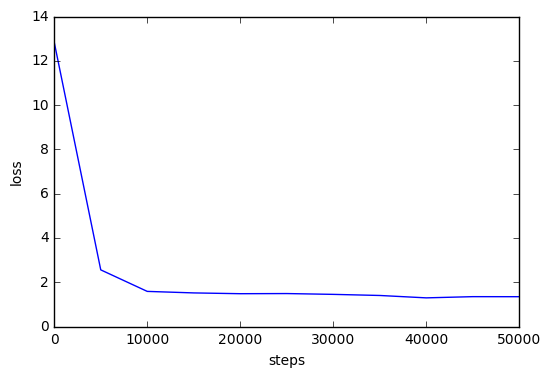

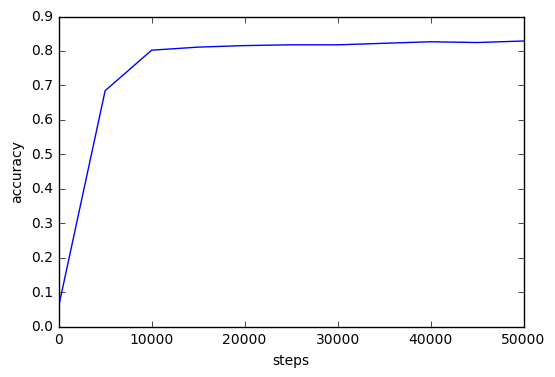

In [1]:
# 导入numpy科学计算库
import numpy as np
# 载入画图工具包
import matplotlib.pyplot as plt

# 导入手写数字数据集
from sklearn.datasets import load_digits

# 用于标签二值化处理，把标签转成独热编码one-hot的格式
from sklearn.preprocessing import LabelBinarizer

# 用于把数据集拆分为训练集和测试集
from sklearn.cross_validation import train_test_split

# 用于评估分类结果
from sklearn.metrics import classification_report,confusion_matrix

# 定义sigmoid函数
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# 定义sigmoid函数的导数
def dsigmoid(x):
    return x*(1-x)

# 定义神经网络类
class NeuralNetwork:
    # 初始化网络，定义网络结构
    # 假设传入(64,100,10)：
    # 输入层64个神经元，隐藏层100个神经元，输出层10个神经元
    def __init__(self,layers):
        # 权值的初始化，范围:-1~1
        # 这里思考一下权值矩阵的随机取值范围能不能取0~1?
        self.W1 = np.random.random([layers[0],layers[1]])*2-1
        self.W2 = np.random.random([layers[1],layers[2]])*2-1
        # 初始化偏置值
        self.b1 = np.zeros([layers[1]])
        self.b2 = np.zeros([layers[2]])
        # 定义空list用于保存损失函数值
        self.loss = []
        # 定义空list用于保存准确率
        self.accuracy = []

    # 训练模型
    # X:数据输入
    # Label:数据对应的标签
    # lr:学习率
    # steps:训练次数
    # batch:批次大小
    # 使用Batch-SGD,每次随机抽取一个批次的数据进行训练
    def train(self,X,Label,lr=0.5,steps=20000,test=5000,batch=50):
        for n in range(steps + 1):
            # 随机选取一个批次数据
            index = np.random.randint(0,X.shape[0],batch) 
            x = X[index]
            # 计算隐藏层输出
            L1 = sigmoid(np.dot(x,self.W1) + self.b1)
            # 计算输出层输出
            L2 = sigmoid(np.dot(L1,self.W2) + self.b2)
            # 求输出层的学习信号
            delta_L2 = (Label[index] - L2) * dsigmoid(L2)
            # 求隐藏层的学习信号
            delta_L1= delta_L2.dot(self.W2.T) * dsigmoid(L1)
            
            # 求隐藏层到输出层的权值改变
            # 由于一次计算了多个样本，所以需要求平均
            self.W2 += lr * L1.T.dot(delta_L2) / X.shape[0]
            # 求输入层到隐藏层的权值改变
            # 由于一次计算了多个样本，所以需要求平均
            self.W1 += lr * x.T.dot(delta_L1) / X.shape[0]
            
            # 改变偏置值
            self.b2 = self.b2 + lr * np.mean(delta_L2, axis=0)
            self.b1 = self.b1 + lr * np.mean(delta_L1, axis=0)
            
            # 每训练5000次预测一次准确率
            if n%test == 0:
                # 预测测试集的预测结果
                Y2 = self.predict(X_test)
                # 取得预测结果最大的所在的索引
                # 例如最大值所在的索引是3，那么预测结果就是3
                predictions = np.argmax(Y2,axis=1)
                
                # 计算准确率
                # np.equal(predictions,y_test)判断预测结果和真实标签是否相等，相等返回True，不相等返回False
                # np.equal(predictions,y_test)执行后得到一个包含多个True和False的列表
                # 然后用np.mean对列表求平均True为1，False为0。
                # 例如一共有10个结果，9个True，一个False，平均后的结果为0.9，即预测的准确率为90%
                acc = np.mean(np.equal(predictions,y_test))
                # 计算loss
                l = np.mean(np.square(y_test - predictions) / 2)
                # 保存准确率
                self.accuracy.append(acc)
                # 保存loss值
                self.loss.append(l)
                # 打印训练次数,准确率和loss
                print('steps:%d accuracy:%.3f loss:%.3f' % (n,acc,l))

    # 模型预测结果
    def predict(self,x):
        L1 = sigmoid(np.dot(x,self.W1) + self.b1)  #隐层输出
        L2 = sigmoid(np.dot(L1,self.W2) + self.b2) #输出层输出
        return L2

# 程序从这里开始运行
# 定义训练次数
steps = 50001
# 定义测试周期数
test = 5000
# 载入数据
digits = load_digits()
# 得到数据
X = digits.data
# 得到标签
y = digits.target

# 输入数据归一化，有助于加快训练速度
# X中原来的数值范围是0-255之间，归一化后变成0-1之间
X -= X.min()
X /= X.max() - X.min()

# 分割数据1/4为测试数据，3/4为训练数据
# 有1347个训练数据，450个测试数据
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25) 

# 创建网络,输入层64个神经元，隐藏层100个神经元，输出层10个神经元
nm = NeuralNetwork([64,100,10])
# 标签转化为独热编码one-hot的格式
labels_train = LabelBinarizer().fit_transform(y_train)

# 开始训练
print('Start training')
nm.train(X_train,labels_train,steps=steps,test=test)

# 预测测试数据
predictions = nm.predict(X_test) 
# predictions.shape为(450,10)
# y_test.shape为(450,)
# 所以需要取得预测结果最大的所在的索引，该索引就是网络预测的结果
# np.argmax(predictions,axis=1)执行后得到的形状也变成了(450,)
predictions = np.argmax(predictions,axis=1)
# 对比测试数据的真实标签与网络预测结果，得到准确率，召回率和F1值
print(classification_report(y_test,predictions))
# 对于测试数据的真实标签与网络预测结果，得到混淆矩阵
print(confusion_matrix(y_test,predictions))

# 训练次数与loss的关系图
plt.plot(range(0,steps+1,test),nm.loss)
plt.xlabel('steps')
plt.ylabel('loss')
plt.show()

# 训练次数与accuracy的关系图
plt.plot(range(0,steps+1,test),nm.accuracy)
plt.xlabel('steps')
plt.ylabel('accuracy')
plt.show()